## Problem Statement 

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others 


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

import swifter

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from pprint import pprint

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [2]:
# Opening JSON file 
f = open('complaints-2021-05-14_08_16.json', 'r')
  
# returns JSON object as  
# a dictionary 
data = json.load(f)
df=pd.json_normalize(data)


## Data preparation

In [3]:
# Inspect the dataframe to understand the given data.

df.head(10)


,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A
5,complaint-public-v2,complaint,3275312,0.0,Older American,48227,3275312,Managing an account,2019-06-13T12:00:00-05:00,MI,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-14T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
6,complaint-public-v2,complaint,3238804,0.0,None,76262,3238804,Managing an account,2019-05-10T12:00:00-05:00,TX,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Phone,2019-05-10T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
7,complaint-public-v2,complaint,3249272,0.0,None,07753,3249272,Trouble during payment process,2019-05-15T12:00:00-05:00,NJ,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-05-21T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,N/A
8,complaint-public-v2,complaint,3351653,0.0,None,60621,3351653,Closing an account,2019-08-22T12:00:00-05:00,IL,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-08-23T12:00:00-05:00,None,Checking account,Yes,,Company closed your account,N/A
9,complaint-public-v2,complaint,3273612,0.0,None,99354,3273612,Managing an account,2019-06-11T12:00:00-05:00,WA,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-17T12:00:00-05:00,None,Checking account,Yes,,Cashing a check,N/A


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
_score,78313.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape

(78313, 22)

In [6]:
# printing the column names
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [7]:
# Assign new column names

# since the given column names are not good for use, let's rename them
df.rename(columns={'_index': 'S_No', '_type': 'type', '_id': 'ref_id', '_score': 'score', '_source.tags': 'tags', '_source.zip_code': 'zip_code', '_source.complaint_id': 'complaint_id', '_source.issue': 'issue', '_source.date_received': 'date_received', '_source.state': 'state', '_source.consumer_disputed': 'consumer_disputed', '_source.product': 'product', '_source.company_response': 'company_response',
                   '_source.company': 'company', '_source.submitted_via': 'submitted_via', '_source.date_sent_to_company': 'date_sent_to_company', '_source.company_public_response': 'company_public_response', '_source.sub_product': 'sub_product', '_source.timely': 'timely', '_source.complaint_what_happened': 'complaint', '_source.sub_issue': 'sub_issue', '_source.consumer_consent_provided': 'consumer_consent_provided'}, inplace=True)


In [8]:
# updated columns
df.columns

Index(['S_No', 'type', 'ref_id', 'score', 'tags', 'zip_code', 'complaint_id',
       'issue', 'date_received', 'state', 'consumer_disputed', 'product',
       'company_response', 'company', 'submitted_via', 'date_sent_to_company',
       'company_public_response', 'sub_product', 'timely', 'complaint',
       'sub_issue', 'consumer_consent_provided'],
      dtype='object')

### 
-Credit card / Prepaid card
-Bank account services
-Theft/Dispute reporting
-Mortgages/loans
-Others

In [9]:
df['product'].value_counts()

Mortgage                                                                        22725
Checking or savings account                                                     12147
Credit card or prepaid card                                                     10797
Credit card                                                                     10373
Bank account or service                                                          9816
Credit reporting, credit repair services, or other personal consumer reports     4310
Debt collection                                                                  3201
Money transfer, virtual currency, or money service                               1500
Consumer Loan                                                                    1029
Vehicle loan or lease                                                             892
Student loan                                                                      866
Money transfers                                       

In [10]:
# Assign nan in place of blanks in the complaints column

df.loc[df['complaint'] == '', 'complaint'] = np.NaN


In [11]:
print(df['complaint'].size)
print(df['complaint'].isna().value_counts())


78313
True     57241
False    21072
Name: complaint, dtype: int64


In [12]:
# Remove all rows where complaints column is nan

df.dropna(subset=['complaint'], inplace=True)
# df = df[~df['complaint'].isna()]


In [13]:
print(df.size)
print(len(df))
print(df.shape)

463584
21072
(21072, 22)


In [14]:
df.head(2)

,S_No,type,ref_id,score,tags,zip_code,complaint_id,issue,date_received,state,...,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint,sub_issue,consumer_consent_provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided


In [15]:
# updating column types
convert_dict = {
    'complaint':str,
    'product':str
}
df_new = df.astype(convert_dict)

In [16]:
df_new.head()

,S_No,type,ref_id,score,tags,zip_code,complaint_id,issue,date_received,state,...,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint,sub_issue,consumer_consent_provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
10,complaint-public-v2,complaint,3233499,0.0,None,104XX,3233499,Incorrect information on your report,2019-05-06T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-06T12:00:00-05:00,None,Other personal consumer report,Yes,Chase Card was reported on XX/XX/2019. However...,Information belongs to someone else,Consent provided
11,complaint-public-v2,complaint,3180294,0.0,None,750XX,3180294,Incorrect information on your report,2019-03-14T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-03-15T12:00:00-05:00,None,Credit reporting,Yes,"On XX/XX/2018, while trying to book a XXXX XX...",Information belongs to someone else,Consent provided
14,complaint-public-v2,complaint,3224980,0.0,None,920XX,3224980,Managing an account,2019-04-27T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-27T12:00:00-05:00,None,Checking account,Yes,my grand son give me check for {$1600.00} i de...,Funds not handled or disbursed as instructed,Consent provided


In [17]:
# adding complaint column to new column (creating backup column)
df_new['RawDescription'] = df_new['complaint']
df_new.head()

,S_No,type,ref_id,score,tags,zip_code,complaint_id,issue,date_received,state,...,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint,sub_issue,consumer_consent_provided,RawDescription
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided,Good morning my name is XXXX XXXX and I apprec...
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided,I upgraded my XXXX XXXX card in XX/XX/2018 and...
10,complaint-public-v2,complaint,3233499,0.0,None,104XX,3233499,Incorrect information on your report,2019-05-06T12:00:00-05:00,NY,...,JPMORGAN CHASE & CO.,Web,2019-05-06T12:00:00-05:00,None,Other personal consumer report,Yes,Chase Card was reported on XX/XX/2019. However...,Information belongs to someone else,Consent provided,Chase Card was reported on XX/XX/2019. However...
11,complaint-public-v2,complaint,3180294,0.0,None,750XX,3180294,Incorrect information on your report,2019-03-14T12:00:00-05:00,TX,...,JPMORGAN CHASE & CO.,Web,2019-03-15T12:00:00-05:00,None,Credit reporting,Yes,"On XX/XX/2018, while trying to book a XXXX XX...",Information belongs to someone else,Consent provided,"On XX/XX/2018, while trying to book a XXXX XX..."
14,complaint-public-v2,complaint,3224980,0.0,None,920XX,3224980,Managing an account,2019-04-27T12:00:00-05:00,CA,...,JPMORGAN CHASE & CO.,Web,2019-04-27T12:00:00-05:00,None,Checking account,Yes,my grand son give me check for {$1600.00} i de...,Funds not handled or disbursed as instructed,Consent provided,my grand son give me check for {$1600.00} i de...


## performing some initial EDA on raw data

In [18]:
# count number of words in each row.
df_new['RawWordCount'] = [len(desc.split(' ')) for desc in df_new['RawDescription']]
df_new.head()
wordCount_before = df_new['RawWordCount'].sum()

In [19]:
print("Total Corpus Word Count: ", wordCount_before)

Total Corpus Word Count:  5352137


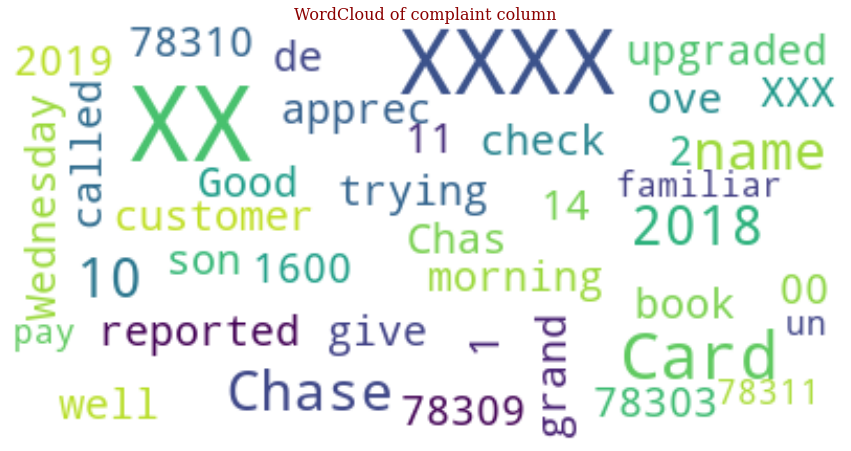

In [179]:
# printing word cloud of raw data before pre-processing

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

# width and height in the wordcloud attribute does not work
wordcloud = WordCloud(max_font_size=50, max_words=40, background_color="white", include_numbers=True).generate(str(df_new["RawDescription"]))  
plt.figure(figsize=(15,15))
plt.title("WordCloud of complaint column", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


<AxesSubplot:title={'center':'Class Label Distribution'}>

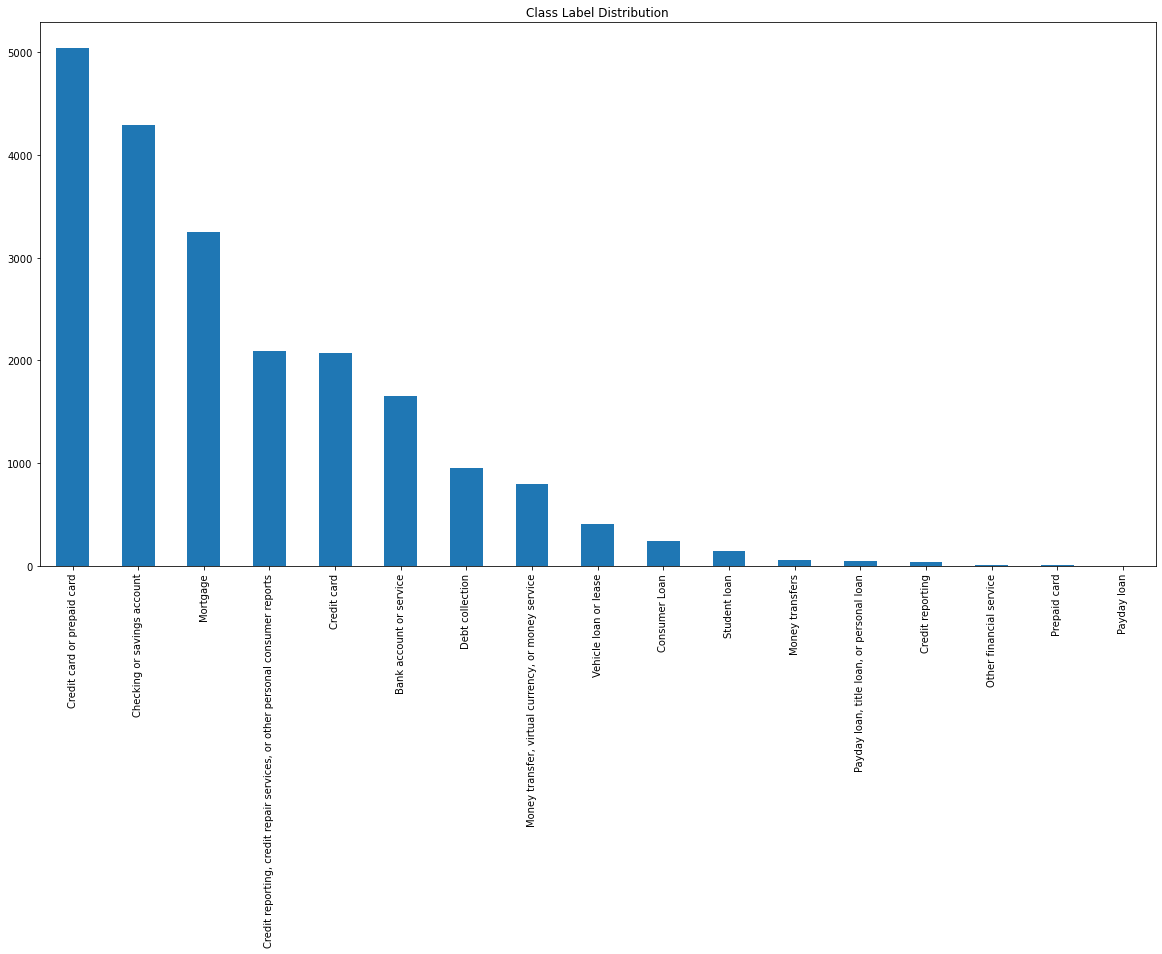

In [21]:
# plotting distriution plot with product column

df_new['product'].value_counts().plot(kind='bar', figsize=(20,10), title='Class Label Distribution')

## Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Use POS tags to get relevant words from the texts.


In [188]:
# function to remove supplied regex's and converting string to lower case

def removeString(data, regex):
    return data.str.lower().str.replace(regex, ' ')

In [189]:
# function to clean dataset 

def cleanDataset(dataset, columnsToClean, regexList):
    for column in columnsToClean:
        for regex in regexList:
            dataset[column] = removeString(dataset[column], regex)

In [190]:
# function to define the regex's
def getRegexList():
    '''
    Adding regex list as per the given data set to flush off the unnecessary text
    
    '''
    regexList = []
    regexList += ['[^a-zA-z 0-9]+']  # anything that is not a letter - removes punctuation
    regexList += ['\[\w*\]'] # removes text between square brackets
    regexList += ['\w*\d\w*'] # removes words with numbers
   
    return regexList


In [191]:
# cleaning the data and assigning it to CleanDescription column

df_new['CleanDescription'] = df_new['RawDescription']
# Select columns for cleaning
columnsToClean = ['CleanDescription']

# Create list of regex to remove sensitive data
# Clean dataset and remove sensitive data
cleanDataset(df_new, columnsToClean, getRegexList())

In [26]:
df_new.shape

(21072, 25)

In [192]:
df_new.head(2)


,S_No,type,ref_id,score,tags,zip_code,complaint_id,issue,date_received,state,...,sub_product,timely,complaint,sub_issue,consumer_consent_provided,RawDescription,RawWordCount,CleanDescription,lemma_complaint,complaint_POS_removed
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided,Good morning my name is XXXX XXXX and I apprec...,92,good morning my name is xxxx xxxx and i apprec...,good morning my name is xxxx xxxx and i apprec...,morning name xxxx xxxx stop bank cardmember se...
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided,I upgraded my XXXX XXXX card in XX/XX/2018 and...,65,i upgraded my xxxx xxxx card in xx xx and wa...,i upgraded my xxxx xxxx card in xx xx and w...,xxxx xxxx card xx xx agent anniversary date ag...


In [28]:
# function to get lemma of the words in complaint text
# also, returns text with only noun pos tags

# return 1 : lemmatized text
# return 2 : text wiht only pos noun tags

# We will only kammatize nouns as other pos tagged words are not needed to be lemmatized or lemmatized words are not usefull. 
# More over stop words are tagged as nouns, so tis will also help us removing stop words

def getLemma(text=''):
    res1 = []
    res2 = []
    doc = nlp(text)
    for token in doc:
        if (token.pos_ == 'NOUN' or token.pos_ == 'PROPN'):
            res1.append(token.lemma_)
            res2.append(token.text)
        else:
            res1.append(token.text)
    return ' '.join(res1), ' '.join(res2)

In [29]:
# function to get lemmatized data and noun pos tags by aplying above function

def lemmatizeData(data, column):
    data[['lemma_complaint',
         'complaint_POS_removed']] = pd.DataFrame(data[column].swifter.apply(getLemma).tolist(), index = df.index)


In [30]:
# converting text to lemmatized text
# converting only nouns as others are not useful anyhow

lemmatizeData(df_new, 'CleanDescription')


Pandas Apply: 100%|██████████| 21072/21072 [08:50<00:00, 39.70it/s]


In [31]:
# Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints
df_clean = df_new[['RawDescription', 'CleanDescription', 'lemma_complaint', 'complaint_POS_removed']
]

In [32]:
df_clean.reset_index(drop=True, inplace=True)


In [33]:
df_clean.head()


,RawDescription,CleanDescription,lemma_complaint,complaint_POS_removed
0,Good morning my name is XXXX XXXX and I apprec...,good morning my name is xxxx xxxx and i apprec...,good morning my name is xxxx xxxx and i apprec...,morning name xxxx xxxx stop bank cardmember se...
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,i upgraded my xxxx xxxx card in xx xx and wa...,i upgraded my xxxx xxxx card in xx xx and w...,xxxx xxxx card xx xx agent anniversary date ag...
2,Chase Card was reported on XX/XX/2019. However...,chase card was reported on xx xx however f...,chase card was reported on xx xx however ...,chase card xx xx application identity consent ...
3,"On XX/XX/2018, while trying to book a XXXX XX...",on xx xx while trying to book a xxxx xxxx ...,on xx xx while trying to book a xxxx xxx...,xx xx xxxx xxxx ticket offer ticket rewards ca...
4,my grand son give me check for {$1600.00} i de...,my grand son give me check for i deposit...,my grand son give me check for i deposi...,son chase account fund chase bank account mone...


In [34]:
df_clean.shape

(21072, 4)

## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




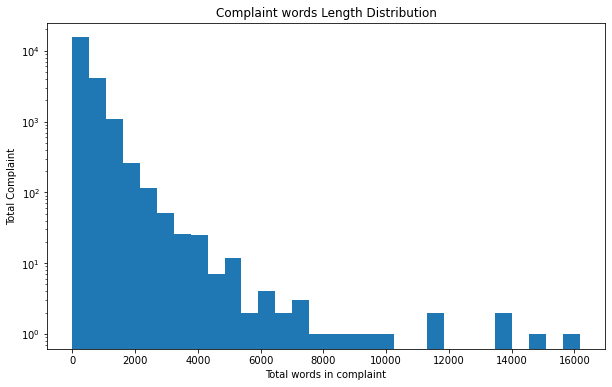

In [35]:
# Write your code here to visualise the data according to the 'Complaint' character length

# using pos removed column for ditrinution plot as tjis will not have any stop words

df_clean["complaint_POS_removed"].str.len()
character_length = [len(d) for d in df_clean["complaint_POS_removed"]]
plt.figure(figsize=(10, 6))
plt.title("Complaint words Length Distribution")
plt.hist(character_length, bins=30, log=True)
plt.xlabel("Total words in complaint")
plt.ylabel("Total Complaint")

plt.show()


#### As we can see there are very less documents with words more than 10K and more tahn 1K are only arund 2k documents

#### Find the top 40 words by frequency among all the articles after processing the text.

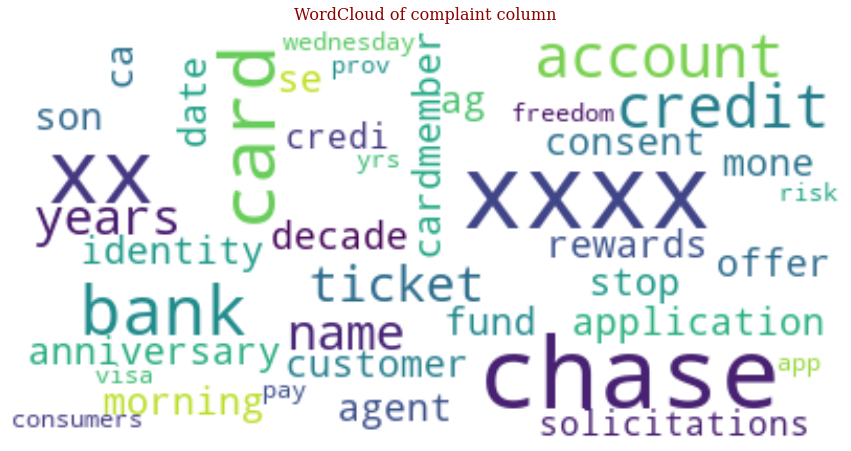

In [36]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text

# complaint_POS_removed column will not have any stop words as this text is generated with only noun POS tags

wordcloud = WordCloud(max_font_size=50, max_words=40, background_color="white").generate(str(df_clean["complaint_POS_removed"]))
plt.figure(figsize=(15, 15))
plt.title("WordCloud of complaint column", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [37]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

<ipython-input-37-2ee47e6ecbae>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
df_clean

,RawDescription,CleanDescription,lemma_complaint,complaint_POS_removed,Complaint_clean
0,Good morning my name is XXXX XXXX and I apprec...,good morning my name is xxxx xxxx and i apprec...,good morning my name is xxxx xxxx and i apprec...,morning name xxxx xxxx stop bank cardmember se...,morning name xxxx xxxx stop bank cardmember se...
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,i upgraded my xxxx xxxx card in xx xx and wa...,i upgraded my xxxx xxxx card in xx xx and w...,xxxx xxxx card xx xx agent anniversary date ag...,xxxx xxxx card xx xx agent anniversary date ag...
2,Chase Card was reported on XX/XX/2019. However...,chase card was reported on xx xx however f...,chase card was reported on xx xx however ...,chase card xx xx application identity consent ...,chase card xx xx application identity consent ...
3,"On XX/XX/2018, while trying to book a XXXX XX...",on xx xx while trying to book a xxxx xxxx ...,on xx xx while trying to book a xxxx xxx...,xx xx xxxx xxxx ticket offer ticket rewards ca...,xx xx xxxx xxxx ticket offer ticket rewards ca...
4,my grand son give me check for {$1600.00} i de...,my grand son give me check for i deposit...,my grand son give me check for i deposi...,son chase account fund chase bank account mone...,son chase account fund chase bank account mone...
...,...,...,...,...,...
21067,After being a Chase Card customer for well ove...,after being a chase card customer for well ove...,after being a chase card customer for well ove...,chase card customer decade solicitations credi...,chase card customer decade solicitations credi...
21068,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",on wednesday xx xx xxxx i called chas my xxx...,on wednesday xx xx xxxx i called chas my x...,wednesday xxxx xxxx xxxx visa credit card prov...,wednesday xxxx xxxx xxxx visa credit card prov...
21069,I am not familiar with XXXX pay and did not un...,i am not familiar with xxxx pay and did not un...,i am not familiar with xxxx pay and did not un...,pay risk consumers chase bank app chase years ...,pay risk consumers chase bank app chase years ...
21070,I have had flawless credit for 30 yrs. I've ha...,i have had flawless credit for yrs i ve had...,i have had flawless credit for yrs i ve h...,credit yrs chase credit cards chase freedom xx...,credit yrs chase credit cards chase freedom xx...


#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [39]:
# creating a funciton to build n - gram

def topNGramFreq(text_corpus, n_grams, freq):
    cv = CountVectorizer(ngram_range=(n_grams, n_grams), stop_words='english')
    words_bag = cv.fit_transform(text_corpus)
    words_sum = words_bag.sum(axis=0)
    df_words = pd.DataFrame(words_sum, columns=cv.get_feature_names())
    df_words = df_words.sort_values(by=df_words.index[0], axis=1, ascending=False)

    return [df_words.columns[i] for i in range(freq)]


In [40]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 

unigram = topNGramFreq(df_clean['Complaint_clean'], 1, 30)
unigram

['xxxx',
 'chase',
 'xx',
 'account',
 'credit',
 'card',
 'bank',
 'payment',
 'time',
 'money',
 'loan',
 'information',
 'letter',
 'check',
 'mortgage',
 'number',
 'days',
 'phone',
 'payments',
 'balance',
 'fraud',
 'funds',
 'company',
 'customer',
 'charges',
 'report',
 'day',
 'charge',
 'business',
 'accounts']

In [41]:
#Print the top 10 words in the unigram frequency
unigram[:10]

['xxxx',
 'chase',
 'xx',
 'account',
 'credit',
 'card',
 'bank',
 'payment',
 'time',
 'money']

In [42]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
bigram = topNGramFreq(df_clean['Complaint_clean'], 2, 30)
bigram


['xxxx xxxx',
 'xx xx',
 'xx xxxx',
 'chase bank',
 'credit card',
 'xxxx chase',
 'xxxx xx',
 'chase xxxx',
 'account xxxx',
 'xxxx account',
 'chase credit',
 'account chase',
 'credit report',
 'xxxx credit',
 'customer service',
 'chase account',
 'morgan chase',
 'bank account',
 'card xxxx',
 'bank xxxx',
 'checking account',
 'xxxx payment',
 'number xxxx',
 'debit card',
 'credit cards',
 'jp morgan',
 'card chase',
 'xxxx bank',
 'account account',
 'chase card']

In [43]:
#Print the top 10 words in the bigram frequency

bigram[:10]

['xxxx xxxx',
 'xx xx',
 'xx xxxx',
 'chase bank',
 'credit card',
 'xxxx chase',
 'xxxx xx',
 'chase xxxx',
 'account xxxx',
 'xxxx account']

In [44]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 

trigram = topNGramFreq(df_clean['Complaint_clean'], 3, 30)
trigram

['xxxx xxxx xxxx',
 'xx xx xxxx',
 'xx xxxx xxxx',
 'xxxx xx xx',
 'xxxx xxxx chase',
 'xx xxxx chase',
 'xx xxxx xx',
 'xxxx xxxx xx',
 'chase credit card',
 'xxxx xx xxxx',
 'chase xxxx xxxx',
 'account xxxx xxxx',
 'jp morgan chase',
 'xxxx chase bank',
 'chase bank xxxx',
 'xxxx xxxx account',
 'xxxx credit card',
 'account xx xx',
 'bank xxxx xxxx',
 'xxxx xxxx credit',
 'xx xx chase',
 'chase xx xx',
 'xx xx xx',
 'card xxxx xxxx',
 'credit card xxxx',
 'credit card chase',
 'credit card company',
 'chase bank account',
 'card xx xx',
 'account chase bank']

In [45]:
#Print the top 10 words in the trigram frequency
trigram[:10]

['xxxx xxxx xxxx',
 'xx xx xxxx',
 'xx xxxx xxxx',
 'xxxx xx xx',
 'xxxx xxxx chase',
 'xx xxxx chase',
 'xx xxxx xx',
 'xxxx xxxx xx',
 'chase credit card',
 'xxxx xx xxxx']

#### As we can see all the n grams have xxxx or xx as highest frequency

## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [46]:
# replacing all xxxx or xx words - any words with more than 2 x's will be removed

df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('x{2,}', '', regex=True)


<ipython-input-46-88a2ecb1d222>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
#All masked texts has been removed
df_clean

,RawDescription,CleanDescription,lemma_complaint,complaint_POS_removed,Complaint_clean
0,Good morning my name is XXXX XXXX and I apprec...,good morning my name is xxxx xxxx and i apprec...,good morning my name is xxxx xxxx and i apprec...,morning name xxxx xxxx stop bank cardmember se...,morning name stop bank cardmember services d...
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,i upgraded my xxxx xxxx card in xx xx and wa...,i upgraded my xxxx xxxx card in xx xx and w...,xxxx xxxx card xx xx agent anniversary date ag...,card agent anniversary date agent informat...
2,Chase Card was reported on XX/XX/2019. However...,chase card was reported on xx xx however f...,chase card was reported on xx xx however ...,chase card xx xx application identity consent ...,chase card application identity consent serv...
3,"On XX/XX/2018, while trying to book a XXXX XX...",on xx xx while trying to book a xxxx xxxx ...,on xx xx while trying to book a xxxx xxx...,xx xx xxxx xxxx ticket offer ticket rewards ca...,ticket offer ticket rewards card informati...
4,my grand son give me check for {$1600.00} i de...,my grand son give me check for i deposit...,my grand son give me check for i deposi...,son chase account fund chase bank account mone...,son chase account fund chase bank account mone...
...,...,...,...,...,...
21067,After being a Chase Card customer for well ove...,after being a chase card customer for well ove...,after being a chase card customer for well ove...,chase card customer decade solicitations credi...,chase card customer decade solicitations credi...
21068,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",on wednesday xx xx xxxx i called chas my xxx...,on wednesday xx xx xxxx i called chas my x...,wednesday xxxx xxxx xxxx visa credit card prov...,wednesday visa credit card provider claim p...
21069,I am not familiar with XXXX pay and did not un...,i am not familiar with xxxx pay and did not un...,i am not familiar with xxxx pay and did not un...,pay risk consumers chase bank app chase years ...,pay risk consumers chase bank app chase years ...
21070,I have had flawless credit for 30 yrs. I've ha...,i have had flawless credit for yrs i ve had...,i have had flawless credit for yrs i ve h...,credit yrs chase credit cards chase freedom xx...,credit yrs chase credit cards chase freedom p...


## Performing EDA after perofrming cleaning of XXXX and XX

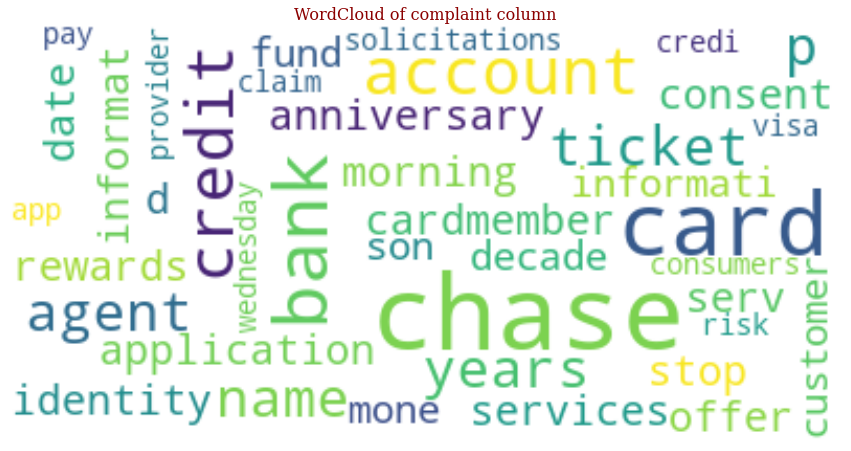

In [193]:

# Complaint_clean column will not have any stop words as this text is generated with only noun POS tags and also rmeoved XXXX and xx

wordcloudClean = WordCloud(max_font_size=50, max_words=40, background_color="white").generate(
    str(df_clean["Complaint_clean"]))
plt.figure(figsize=(15, 15))
plt.title("WordCloud of complaint column", fontdict=font)
plt.imshow(wordcloudClean, interpolation="bilinear")
plt.axis("off")
plt.show()


In [48]:
# unigram after clean
unigram = topNGramFreq(df_clean['Complaint_clean'], 1, 30)
unigram[:10]

['chase',
 'account',
 'credit',
 'card',
 'bank',
 'payment',
 'time',
 'money',
 'loan',
 'information']

In [49]:
# unigram after clean
bigram = topNGramFreq(df_clean['Complaint_clean'], 2, 30)
bigram[:10]


['chase bank',
 'credit card',
 'account chase',
 'chase credit',
 'credit report',
 'customer service',
 'chase account',
 'bank account',
 'morgan chase',
 'checking account']

In [50]:
# unigram after clean
trigram = topNGramFreq(df_clean['Complaint_clean'], 3, 30)
trigram[:10]

['chase credit card',
 'jp morgan chase',
 'credit card chase',
 'chase bank account',
 'account chase bank',
 'credit card company',
 'credit card account',
 'morgan chase bank',
 'chase customer service',
 'chase bank credit']

## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [51]:
# creating TfidfVectorizer  with stop words = english and max_df = 0.95 and min_df = 2

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [52]:
# creating the Document Term Matrix by transforming the complaints column present in df_clean.
dtm = vectorizer.fit_transform(df_clean["Complaint_clean"])


In [53]:
# printing tifidf score for 5 samples.
pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names()).head(5)


,aa,aaa,aarp,aba,abandonment,abatement,abbreviation,abd,abide,abilities,...,yrs,ys,ytd,zelle,zeros,zip,zipcode,zombie,zone,zones
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

In [54]:
# importing NMF from sklearn
from sklearn.decomposition import NMF

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [55]:
# Load your nmf_model with the n_components i.e 5
num_topics = 5

# keeping the random_state = 40
nmf = NMF(n_components=num_topics, random_state=40)


In [56]:
W = nmf.fit_transform(dtm)  # Document-topic matrix
H = nmf.components_         # Topic-term matrix

len(vectorizer.get_feature_names())


7812

In [57]:
#Print the Top15 words for each of the topics

words = np.array(vectorizer.get_feature_names())
topic_words = pd.DataFrame(np.zeros((num_topics, 15)), index=[f'Topic {i + 1}' for i in range(num_topics)],
                           columns=[f'Word {i + 1}' for i in range(15)]).astype(str)
for i in range(num_topics):
    ix = H[i].argsort()[::-1][:15]
    topic_words.iloc[i] = words[ix]

topic_words


,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,account,bank,chase,money,check,funds,branch,checking,deposit,accounts,number,business,days,checks,fraud
Topic 2,credit,report,inquiry,card,inquiries,score,cards,accounts,chase,account,debt,reporting,information,limit,bureaus
Topic 3,loan,mortgage,chase,home,modification,property,payments,foreclosure,years,house,bank,rate,letter,morgan,time
Topic 4,card,chase,charges,charge,credit,dispute,fraud,merchant,transaction,fee,company,purchase,phone,service,number
Topic 5,payment,payments,balance,month,fees,fee,statement,auto,date,chase,time,account,days,months,day


In [58]:
len(W.argmax(axis=1))


21072

In [79]:
# Creating the best topic for each complaint in terms of integer value 0,1,2,3 & 4 using argmax

# Assigning the best topic to each of the complaints in Topic Column

df_clean['Topic'] = W.argmax(axis=1)


<ipython-input-79-6482eb31e164>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
df_clean["Topic"].unique()

array([2, 3, 1, 0, 4], dtype=int64)

In [81]:
df_clean.head()

,RawDescription,CleanDescription,lemma_complaint,complaint_POS_removed,Complaint_clean,Topic
0,Good morning my name is XXXX XXXX and I apprec...,good morning my name is xxxx xxxx and i apprec...,good morning my name is xxxx xxxx and i apprec...,morning name xxxx xxxx stop bank cardmember se...,morning name stop bank cardmember services d...,2
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,i upgraded my xxxx xxxx card in xx xx and wa...,i upgraded my xxxx xxxx card in xx xx and w...,xxxx xxxx card xx xx agent anniversary date ag...,card agent anniversary date agent informat...,3
2,Chase Card was reported on XX/XX/2019. However...,chase card was reported on xx xx however f...,chase card was reported on xx xx however ...,chase card xx xx application identity consent ...,chase card application identity consent serv...,1
3,"On XX/XX/2018, while trying to book a XXXX XX...",on xx xx while trying to book a xxxx xxxx ...,on xx xx while trying to book a xxxx xxx...,xx xx xxxx xxxx ticket offer ticket rewards ca...,ticket offer ticket rewards card informati...,1
4,my grand son give me check for {$1600.00} i de...,my grand son give me check for i deposit...,my grand son give me check for i deposi...,son chase account fund chase bank account mone...,son chase account fund chase bank account mone...,0


In [82]:
# Print the first 5 Complaints for each of the Topics
df_top5 = df_clean.groupby('Topic').head(5)
df_top5.sort_values('Topic')


,RawDescription,CleanDescription,lemma_complaint,complaint_POS_removed,Complaint_clean,Topic
12,I opened an account with chase bank on XXXX an...,i opened an account with chase bank on xxxx an...,i opened an account with chase bank on xxxx an...,account chase bank xxxx code xxxx bonus xx xx ...,account chase bank code bonus terms accou...,0
4,my grand son give me check for {$1600.00} i de...,my grand son give me check for i deposit...,my grand son give me check for i deposi...,son chase account fund chase bank account mone...,son chase account fund chase bank account mone...,0
6,With out notice J.P. Morgan Chase restricted m...,with out notice j p morgan chase restricted m...,with out notice j p morgan chase restricted ...,notice j p morgan chase account debit card tue...,notice j p morgan chase account debit card tue...,0
10,mishandling of this account by Chase auto and ...,mishandling of this account by chase auto and ...,mishandling of this account by chase auto and ...,account chase auto xxxx,account chase auto,0
13,"To whom it may concern, Chase bank charged wro...",to whom it may concern chase bank charged wro...,to whom it may concern chase bank charged wr...,chase bank overdraft fees alert balance fee ba...,chase bank overdraft fees alert balance fee ba...,0
2,Chase Card was reported on XX/XX/2019. However...,chase card was reported on xx xx however f...,chase card was reported on xx xx however ...,chase card xx xx application identity consent ...,chase card application identity consent serv...,1
3,"On XX/XX/2018, while trying to book a XXXX XX...",on xx xx while trying to book a xxxx xxxx ...,on xx xx while trying to book a xxxx xxx...,xx xx xxxx xxxx ticket offer ticket rewards ca...,ticket offer ticket rewards card informati...,1
5,Can you please remove inquiry,can you please remove inquiry,can you please remove inquiry,inquiry,inquiry,1
9,I have a Chase credit card which is incorrectl...,i have a chase credit card which is incorrectl...,i have a chase credit card which is incorrectl...,credit card data credit report company issue,credit card data credit report company issue,1
11,I have reached out to XXXX several times in at...,i have reached out to xxxx several times in at...,i have reached out to xxxx several time in att...,xxxx times attempt inquiry creditor inquiry re...,times attempt inquiry creditor inquiry report...,1


#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [83]:
# Create the dictionary of Topic names and Topics
Topic_names = { 0: "Bank Account services",
                1: "Credit card or prepaid card",
                2: "Mortgage/Loan",
                3: "Theft/Dispute Reporting",
                4: "Others"}
                
# Replace Topics with Topic Names and store it into temp df
df_clean_temp = df_clean.copy()
df_clean_temp['Topic'] = df_clean['Topic'].map(Topic_names)


In [84]:
df_clean_temp.head(5)


,RawDescription,CleanDescription,lemma_complaint,complaint_POS_removed,Complaint_clean,Topic
0,Good morning my name is XXXX XXXX and I apprec...,good morning my name is xxxx xxxx and i apprec...,good morning my name is xxxx xxxx and i apprec...,morning name xxxx xxxx stop bank cardmember se...,morning name stop bank cardmember services d...,Mortgage/Loan
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,i upgraded my xxxx xxxx card in xx xx and wa...,i upgraded my xxxx xxxx card in xx xx and w...,xxxx xxxx card xx xx agent anniversary date ag...,card agent anniversary date agent informat...,Theft/Dispute Reporting
2,Chase Card was reported on XX/XX/2019. However...,chase card was reported on xx xx however f...,chase card was reported on xx xx however ...,chase card xx xx application identity consent ...,chase card application identity consent serv...,Credit card or prepaid card
3,"On XX/XX/2018, while trying to book a XXXX XX...",on xx xx while trying to book a xxxx xxxx ...,on xx xx while trying to book a xxxx xxx...,xx xx xxxx xxxx ticket offer ticket rewards ca...,ticket offer ticket rewards card informati...,Credit card or prepaid card
4,my grand son give me check for {$1600.00} i de...,my grand son give me check for i deposit...,my grand son give me check for i deposi...,son chase account fund chase bank account mone...,son chase account fund chase bank account mone...,Bank Account services


In [85]:
df_clean_temp.shape


(21072, 6)

<AxesSubplot:>

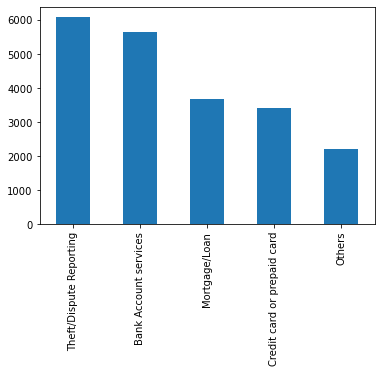

In [86]:
df_clean_temp['Topic'].value_counts().plot.bar()


## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [ ]:
## remapping not needed as previously taken temp dataframe to visulize the data



#Create the dictionary again of Topic names and Topics

# topic_map = {"Bank Account services": 0,
#              "Credit card or prepaid card": 1,
#              "Mortgage/Loan": 2,
#              "Theft/Dispute Reporting": 3,
#              "Others": 4
#              }

#Replace Topics with Topic Names
# df_clean['Topic'] = df_clean['Topic'].map(Topic_names)


### remapping not needed as previously taken temp dataframe to visulize the data

In [87]:
df_clean.head(5)

,RawDescription,CleanDescription,lemma_complaint,complaint_POS_removed,Complaint_clean,Topic
0,Good morning my name is XXXX XXXX and I apprec...,good morning my name is xxxx xxxx and i apprec...,good morning my name is xxxx xxxx and i apprec...,morning name xxxx xxxx stop bank cardmember se...,morning name stop bank cardmember services d...,2
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,i upgraded my xxxx xxxx card in xx xx and wa...,i upgraded my xxxx xxxx card in xx xx and w...,xxxx xxxx card xx xx agent anniversary date ag...,card agent anniversary date agent informat...,3
2,Chase Card was reported on XX/XX/2019. However...,chase card was reported on xx xx however f...,chase card was reported on xx xx however ...,chase card xx xx application identity consent ...,chase card application identity consent serv...,1
3,"On XX/XX/2018, while trying to book a XXXX XX...",on xx xx while trying to book a xxxx xxxx ...,on xx xx while trying to book a xxxx xxx...,xx xx xxxx xxxx ticket offer ticket rewards ca...,ticket offer ticket rewards card informati...,1
4,my grand son give me check for {$1600.00} i de...,my grand son give me check for i deposit...,my grand son give me check for i deposi...,son chase account fund chase bank account mone...,son chase account fund chase bank account mone...,0


In [88]:
#Keep the columns "complaint_what_happened" & "Topic" only in the new dataframe --> training_data

# taking original compaint_what_happended column which is RawDescription in our case

training_data = df_clean[["RawDescription", "Topic"]]


In [89]:
training_data.shape

(21072, 2)

In [90]:
training_data.head(5)

,RawDescription,Topic
0,Good morning my name is XXXX XXXX and I apprec...,2
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,3
2,Chase Card was reported on XX/XX/2019. However...,1
3,"On XX/XX/2018, while trying to book a XXXX XX...",1
4,my grand son give me check for {$1600.00} i de...,0


####Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [91]:

#Write your code to get the Vector count
counts = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
X_train_data = counts.fit_transform(training_data['RawDescription'])

#Write your code here to transform the word vector to tf-idf

tfidf_model = TfidfTransformer(use_idf=True)
X_train_tfidf = tfidf_model.fit_transform(X_train_data)


You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import f1_score


In [136]:
# Write your code here to build any 3 models and evaluate them using the required metrics

# splitting X and Y from df_clean dataset
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data["Topic"], test_size=0.2, random_state=40)
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)



Shape of X_train:  (16857, 15947)
Shape of y_train:  (16857,)
Shape of X_test:  (4215, 15947)
Shape of y_test:  (4215,)


In [144]:
# creating funciton for results scores
def printScores(model, X_test, y_test, y_pred):
    accuracy = log_reg.score(X_test, y_test)
    print("Accuracy of the model is {}".format(accuracy))

    f1 = round(f1_score(y_test, y_pred, average='weighted'), 2)
    print("F1 Score of the model is {}".format(f1))


## Logistic Regression

In [138]:
# using multinomial as we have multi-classification
# using L2 regularization to avoid overfitting
# max iterations = 300
# threshold = 0.5

log_reg = LogisticRegression(
    multi_class="multinomial", solver="lbfgs", penalty='l2', C=0.5, max_iter=300)
log_reg.fit(X_train, y_train)


LogisticRegression(C=0.5, max_iter=300, multi_class='multinomial')

In [145]:
# predicting test data or useen data
y_pred_lr = log_reg.predict(X_test)

In [146]:
# Let's Evaluate the Model for accuracy and f1 score

printScores(log_reg, X_test, y_test, y_pred_lr)

Accuracy of the model is 0.9368920521945433
F1 Score of the model is 0.94


## Decission Tree model

In [141]:
# creaitng absic decission tree model and training it with train data
# using max depth as 20 and min samples per split as 5
dt_model = DecisionTreeClassifier(max_depth=20, min_samples_split=5)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=20, min_samples_split=5)

In [147]:
# predicting test data or useen data

y_pred_dt = dt_model.predict(X_test)


In [148]:
# Let's Evaluate the Model for accuracy and f1 score

printScores(dt_model, X_test, y_test, y_pred_dt)


Accuracy of the model is 0.9368920521945433
F1 Score of the model is 0.81


## Random forests

In [194]:
# creating basic random forest classifier 

rf = RandomForestClassifier(random_state=40, n_jobs=-1)

In [195]:
# performing grid search over max_depth, min_smaples per leaf and n_estimators 

params = {
    'max_depth': [50, 100, 150],
    'min_samples_leaf': [5, 10, 20],
    'n_estimators': [200, 500, 600]
}

#Initialise GridSearchCV with scoring option as F1_Macro for multi-class
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="f1_macro")


In [196]:
%%time
grid_search.fit(X_train, y_train)


Fitting 4 folds for each of 27 candidates, totalling 108 fits
Wall time: 20min 27s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=40),
             n_jobs=-1,
             param_grid={'max_depth': [50, 100, 150],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [200, 500, 600]},
             scoring='f1_macro', verbose=1)

In [197]:
grid_search.best_score_


0.7927232589516491

In [198]:
# get the Best Random Forest
rf_best = grid_search.best_estimator_
rf_best


RandomForestClassifier(max_depth=100, min_samples_leaf=5, n_estimators=600,
                       n_jobs=-1, random_state=40)

In [199]:
# predicting test data or useen data
y_pred_rf = rf_best.predict(X_test)


In [200]:
# Let's Evaluate the Model for accuracy and f1 score

printScores(rf_best, X_test, y_test, y_pred_rf)


Accuracy of the model is 0.9368920521945433
F1 Score of the model is 0.82


## Naive bayes

In [161]:
# creating basic Multi nomial Naive Bayes model and training on train data
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [163]:
# predicting test data or useen data
y_pred_nb = nb_model.predict(X_test)


In [164]:
# Let's Evaluate the Model for accuracy and f1 score

printScores(log_reg, X_test, y_test, y_pred_nb)


Accuracy of the model is 0.9368920521945433
F1 Score of the model is 0.72


# Observation: Among all the 4 models above, Logistic regression gave good results of both acucracy and f1 scores. So, we will be seleciton logistic regression as our final model

## using Logistic regresison model let's evaluate some custom text

In [166]:
# some custom data
custom_corpus = ["Credit Card purchase", "Loan rejection letter", "Fraud transaction happened",
                 "refund status on card fraud", "my cashier check has not been cashed", "intra day trading"]
topics = log_reg.predict(counts.transform(custom_corpus))


In [169]:
Topic_names = {0: "Bank Account services",
                           1: "Credit card or prepaid card",
                           2: "Mortgage/Loan",
                           3: "Theft/Dispute Reporting",
                           4: "Others"}


In [170]:
# predictions and results
topic_arr = []
for topic in topics:
    topic_arr.append(Topic_names.get(topic))

custom_topic = zip(custom_corpus, topic_arr)
for out in list(custom_topic):
    print(out)


('Credit Card purchase', 'Theft/Dispute Reporting')
('Loan rejection letter', 'Mortgage/Loan')
('Fraud transaction happened', 'Theft/Dispute Reporting')
('refund status on card fraud', 'Theft/Dispute Reporting')
('my cashier check has not been cashed', 'Bank Account services')
('intra day trading', 'Theft/Dispute Reporting')
